In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import csv
import os
warnings.filterwarnings('ignore')


In [2]:
print(len(['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y']))

221


In [3]:
data=pd.read_csv('final_features.csv')

In [4]:
data.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,-72.266625,-37.072086,-31.142730,94.064854,-45.053242,-34.155221,-76.548099,99.282776,50.791731,-17.566246
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,...,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,...,36.089472,47.193216,-49.969586,44.796028,39.740803,-33.763309,-98.282341,22.118795,68.802072,21.025373


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Columns: 221 entries, Unnamed: 0 to 95_y
dtypes: float64(206), int64(15)
memory usage: 681.7 MB


In [6]:
type(data.columns)

pandas.core.indexes.base.Index

# Converting strings to numerics

In [7]:
#converting all the features into numeric before appllying to any model...
cols=list(data.columns)
for i in cols:
    data[i]=data[i].apply(pd.to_numeric)
    print(i)

Unnamed: 0
id
is_duplicate
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44

In [8]:
data.head()
print(data.shape)

(404290, 221)


# Taking only subset of data...

In [10]:
sdata=data.iloc[0:100000,]
sdata.head()
print(sdata.shape)

(100000, 221)


In [11]:
sdata.drop(data.index[0],inplace=True)
y_true=sdata['is_duplicate']
sdata.drop(['Unnamed: 0','id','is_duplicate'],axis=1,inplace=True)
sdata.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,...,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,...,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,...,36.089472,47.193216,-49.969586,44.796028,39.740803,-33.763309,-98.282341,22.118795,68.802072,21.025373
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,...,-45.945059,-16.685298,-33.416315,-69.760385,-146.785263,-19.066042,12.203929,199.880774,68.090964,90.085963


In [12]:
sdata.shape

(99999, 218)

In [13]:
y_true.shape

(99999,)

In [14]:
y_true=list(map(int,y_true.values))

In [15]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score,log_loss
from collections import Counter
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,auc,roc_curve


# Random Train Test split (70:30)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(sdata,y_true,stratify=y_true,test_size=0.3)

In [18]:
print("no fo data in train set: ",X_train.shape)
print("no fo data in train set: ",X_test.shape)

no fo data in train set:  (69999, 218)
no fo data in train set:  (30000, 218)


In [19]:
from collections import Counter
print("distribution of output variable in train data: ")
train_distr=Counter(y_train)
train_len=len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ",int(train_distr[1])/train_len)
print("Distribution of output variable in train data")
test_distr=Counter(y_test)
test_len=len(y_test)
print("Class 0: ",int(test_distr[0])/test_len,"Class 1: ",int(test_distr[1])/test_len)

distribution of output variable in train data: 
Class 0:  0.6274518207402963 Class 1:  0.3725481792597037
Distribution of output variable in train data
Class 0:  0.6274666666666666 Class 1:  0.3725333333333333


In [20]:
#This functions plots the confusion matrices 
def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels=[1,2]
    cmap=sns.light_palette('blue')
    plt.subplot(1,3,1)
    #representing C in heatmap format
    sns.heatmap(C,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion Matrix')
    #representing B in heatmap format
    plt.subplot(1,3,2)
    sns.heatmap(B,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision Matrix')
    #representing A in heatmap format
    plt.subplot(1,3,3)
    sns.heatmap(A,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall Matrix')
    
    

# Building a Random Model(Finding worst case log-loss)

Log loss on test data using Random model 0.8908017631789112


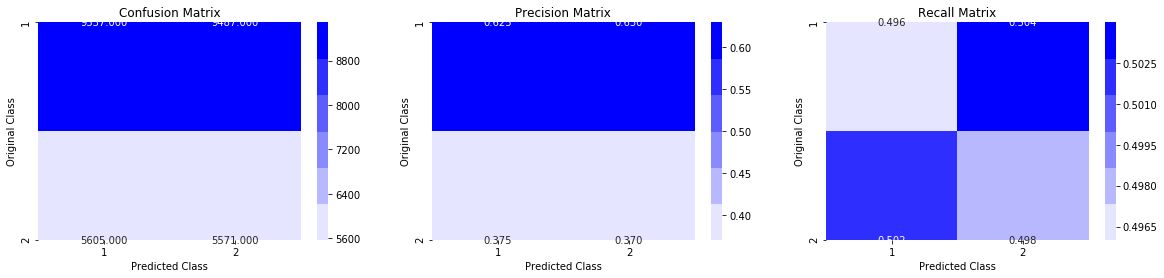

In [21]:
import numpy as np
predicted_y=np.zeros((test_len,2))
for i in range(test_len):
    rand_probs=np.random.rand(1,2)
    predicted_y[i]=((rand_probs/sum(sum(rand_probs)))[0])
print('Log loss on test data using Random model',log_loss(y_test,predicted_y,eps=1e-15))
predicted_y=np.argmax(predicted_y,axis=1)
plot_confusion_matrix(y_test,predicted_y)

# Logistic Regression with hyperparamenter tuning

For values of alpha=  1e-05 The log loss is: 0.5726577159241646
For values of alpha=  0.0001 The log loss is: 0.46263587004489903
For values of alpha=  0.001 The log loss is: 0.4612144922663456
For values of alpha=  0.01 The log loss is: 0.4626455612464151
For values of alpha=  0.1 The log loss is: 0.46394837692200963
For values of alpha=  1 The log loss is: 0.49203534603962124
For values of alpha=  10 The log loss is: 0.5292844873434301


Text(0, 0.5, 'error measure')

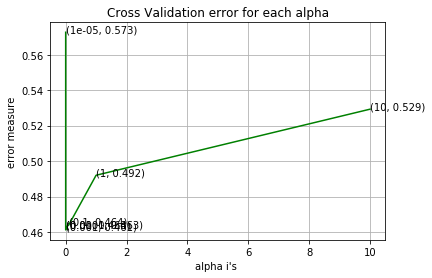

In [22]:
alpha=[10**x for x in range(-5,2)]  #hyperparameter for SGD classifier.
log_error_array=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
    clf.fit(X_train,y_train)
    sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(X_train,y_train)
    predict_y=sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    print("For values of alpha= ",i,"The log loss is:",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

fig,ax=plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i,txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation error for each alpha")
plt.xlabel("alpha i's ")
plt.ylabel('error measure')


In [23]:
best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log',random_state=42)
clf.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=42,
                                                    shuffle=True, tol=0.001,
                                           

for values of best alpha=  0.001 The train log loss is: 0.45775486870244625
for values of best alpha=  0.001 The test log loss is: 0.4612144922663456
Total no of data points: 30000


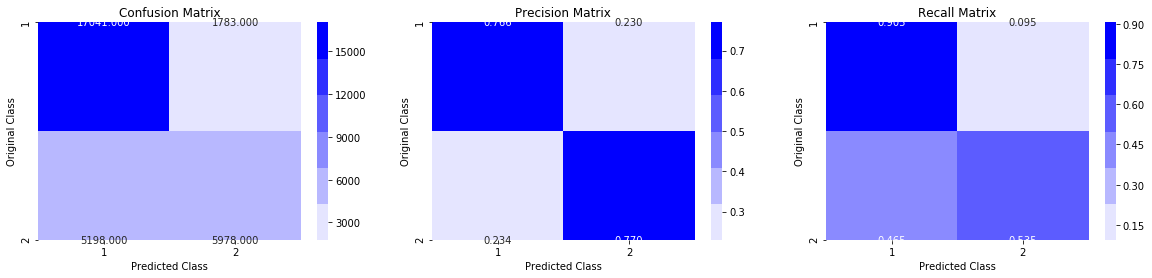

In [24]:
predict_y=sig_clf.predict_proba(X_train)
print("for values of best alpha= ",alpha[best_alpha],"The train log loss is:", log_loss(y_train,predict_y,labels=clf.classes_,eps=1e-15))
predict_y=sig_clf.predict_proba(X_test)
print("for values of best alpha= ",alpha[best_alpha],"The test log loss is:", log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
predicted_y=np.argmax(predict_y,axis=1)
print('Total no of data points:', len(predicted_y))
plot_confusion_matrix(y_test,predicted_y)

# Linear SVM with hyperparameter tuning..

For values of alpha=  1e-05 The log loss is: 0.6602902114362172
For values of alpha=  0.0001 The log loss is: 0.6602902114362172
For values of alpha=  0.001 The log loss is: 0.6602902114362172
For values of alpha=  0.01 The log loss is: 0.4834973585654962
For values of alpha=  0.1 The log loss is: 0.5563988144777294
For values of alpha=  1 The log loss is: 0.6244012876142679
For values of alpha=  10 The log loss is: 0.6602902114362172


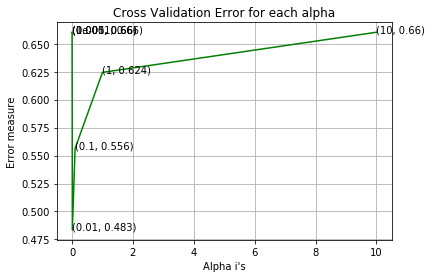

For values of best alpha=  0.01 The train log loss is: 0.4835483460614944
For values of best alpha=  0.01 The test log loss is: 0.4834973585654962
Total number of data points : 30000


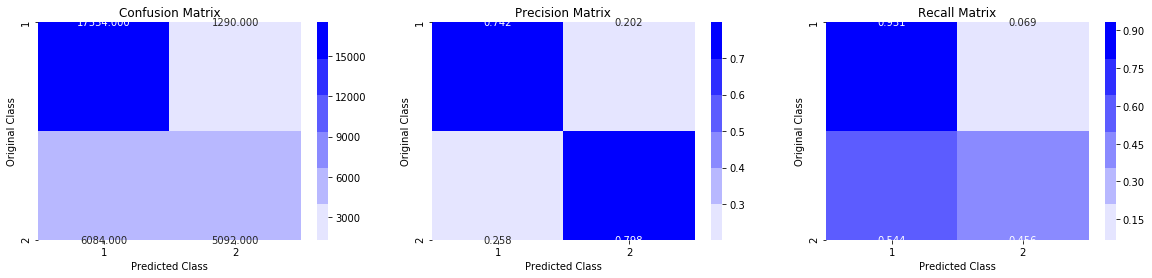

In [26]:
alpha=[10**x for x in range(-5,2)]
log_error_array=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,penalty='l1',loss='hinge',random_state=42)
    clf.fit(X_train,y_train)
    sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(X_train,y_train)
    predict_y=sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    print('For values of alpha= ',i,"The log loss is:",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

fig,ax=plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i,txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l1',loss='hinge',random_state=42)
clf.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(X_train,y_train)

predict_y=sig_clf.predict_proba(X_train)
print('For values of best alpha= ',alpha[best_alpha],'The train log loss is:',log_loss(y_train,predict_y,labels=clf.classes_,eps=1e-15))
predict_y=sig_clf.predict_proba(X_test)
print('For values of best alpha= ',alpha[best_alpha],"The test log loss is:", log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Xg Boost

In [29]:
import xgboost as xgb
params={}
params['objective']='binary:logistic'
params['eval_metric']='logloss'
params['eta']=0.02
params['max_depth']=4

d_train=xgb.DMatrix(X_train,label=y_train)
d_test=xgb.DMatrix(X_test,label=y_test)
watchlist=[(d_train,'train'),(d_test,'valid')]
bst=xgb.train(params,d_train,400,watchlist,early_stopping_rounds=20,verbose_eval=10)

xgdmat=xgb.DMatrix(X_train,y_train)
predict_y=bst.predict(d_test)
print("The test log loss is:",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

[0]	train-logloss:0.684931	valid-logloss:0.684927
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.616049	valid-logloss:0.615864
[20]	train-logloss:0.565121	valid-logloss:0.564695
[30]	train-logloss:0.527054	valid-logloss:0.526487
[40]	train-logloss:0.497846	valid-logloss:0.497171
[50]	train-logloss:0.47517	valid-logloss:0.474356
[60]	train-logloss:0.457196	valid-logloss:0.456393
[70]	train-logloss:0.442437	valid-logloss:0.441672
[80]	train-logloss:0.43085	valid-logloss:0.430125
[90]	train-logloss:0.421049	valid-logloss:0.420407
[100]	train-logloss:0.412977	valid-logloss:0.412429
[110]	train-logloss:0.406202	valid-logloss:0.405775
[120]	train-logloss:0.400438	valid-logloss:0.400147
[130]	train-logloss:0.395269	valid-logloss:0.39515
[140]	train-logloss:0.390966	valid-logloss:0.39097
[150]	train-logloss:0.38745	valid-logloss:0.387611
[160]	train-logloss:0.384381	vali

Total number of data points : 30000


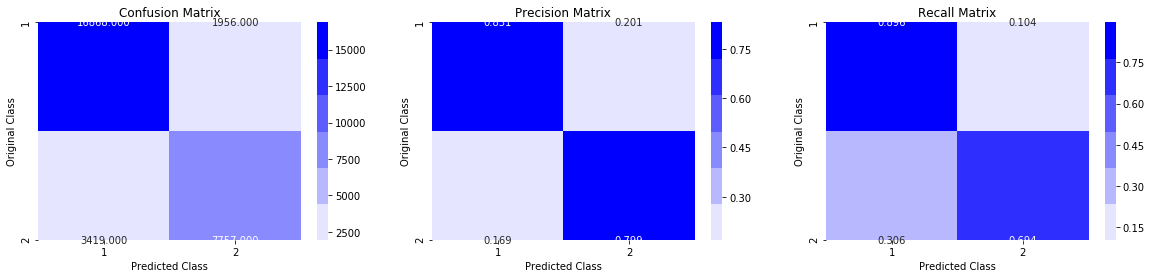

In [30]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)